<h1><center>Predicting NBA Game Attendance Using Numerous Regression Techniques </center></h1>

In [1]:
import pandas as pd
import src.data.datasets as ds
import src.data.train_test_split as split
import src.features.clustering as clustering
import src.features.decomposition as decomposition
import src.features.statistical_tests as st
import src.initialize_jupyter
import src.models.ensemble_models as ensembles
import src.models.linear_models as linear_models
import src.models.metrics as metrics
import src.models.neural_networks as nn
import src.visualization.data_exploration as de

Using TensorFlow backend.


## Load data
---
This data was originally scraped from multiple sources and includes game data since the 1998-1999 season.\
Three datasets have been created for use with many regression techniques:
- dataset_1: Game data since January, 2004 that includes Google Trends monthly popularity data per team, filtering of games based on usage of current day stadia, and stadium capacities )
- dataset_2: Game data since Fall, 1998 not including popularity, filtering, or capacities
- dataset_3: Game data since 1990 including filtering and capacities, but not popularity

In [2]:
dataset_1 = ds.load_dataset('dataset_1')
print("dataset_1 contains: {} observations, {} features: 7 numerical, 6 multiclass categorical".format(len(dataset_1), len(dataset_1.columns)))
dataset_1.head()

dataset_1 contains: 14088 observations, 13 features: 7 numerical, 6 multiclass categorical


,V Pop,H Pop,Curr Win %,LS Win %,Last Game,Last Attendance vs Opp,Capacity,Playoffs?,Last Five,Day of Week,Month,Rivalry?,Attendance
Time,,,,,,,,,,,,,
2004-01-02 19:00:00,3.0,3.0,0.333333,0.465753,13897.0,15108.0,20356.0,0.0,1.0,Friday,January,0.0,12466.0
2004-01-02 19:30:00,4.0,9.0,0.689655,0.556962,18624.0,18624.0,18624.0,0.0,4.0,Friday,January,0.0,18624.0
2004-01-02 19:30:00,19.0,2.0,0.275862,0.338028,16500.0,20166.0,19600.0,0.0,1.0,Friday,January,1.0,15864.0
2004-01-02 20:00:00,5.0,2.0,0.714286,0.625000,20092.0,17093.0,18978.0,0.0,4.0,Friday,January,0.0,17074.0
2004-01-02 22:00:00,4.0,2.0,0.481481,0.580247,17237.0,18102.0,19441.0,0.0,2.0,Friday,January,0.0,17316.0


## Create train-test split of dataset and one hot encode categorical features
---

In [3]:
X_train, X_test, y_train, y_test, train = split.split(dataset_1)
print("{} observations in training set".format(len(X_train), len(X_train.columns)))
print("{} observations in test set".format(len(X_test), len(X_test.columns)))
print("Features: 7 numerical, 24 binary categorical; Response: 1 numerical")

10566 observations in training set
3522 observations in test set
Features: 7 numerical, 24 binary categorical; Response: 1 numerical


## Visualizations for data exploration and feature engineering/selection
---

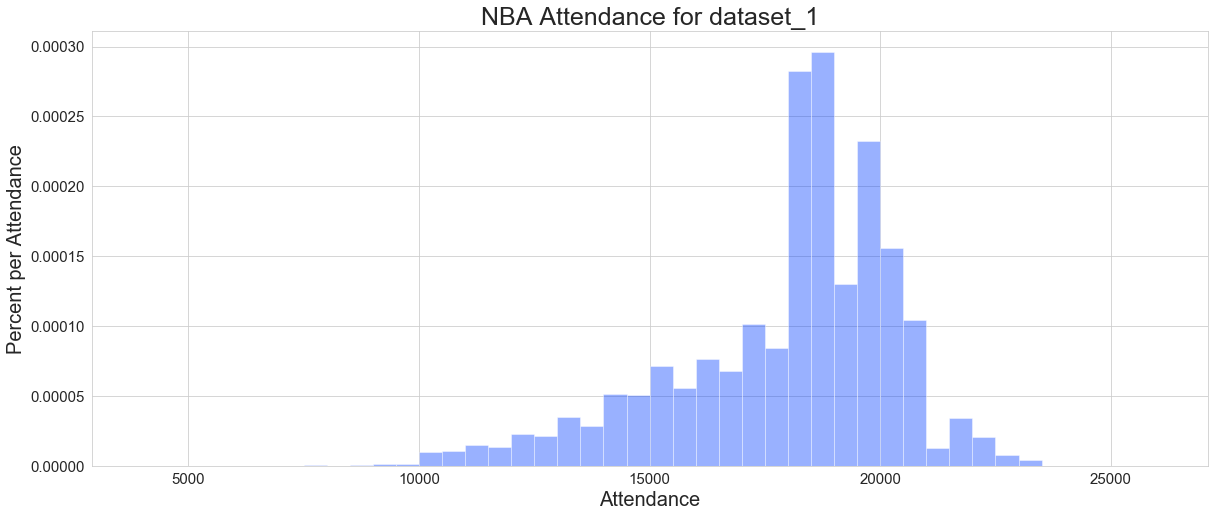

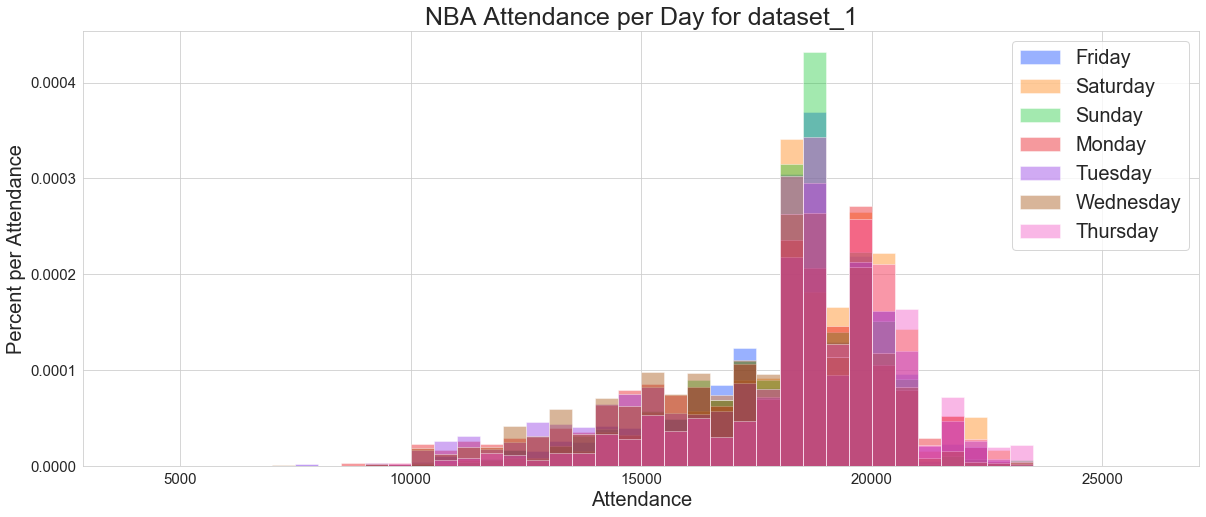

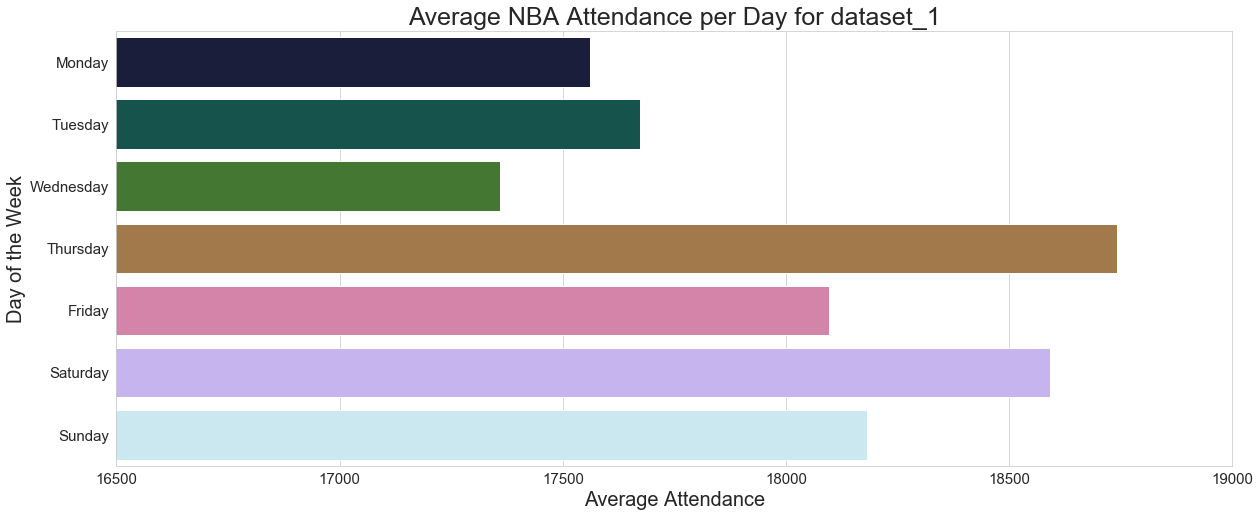

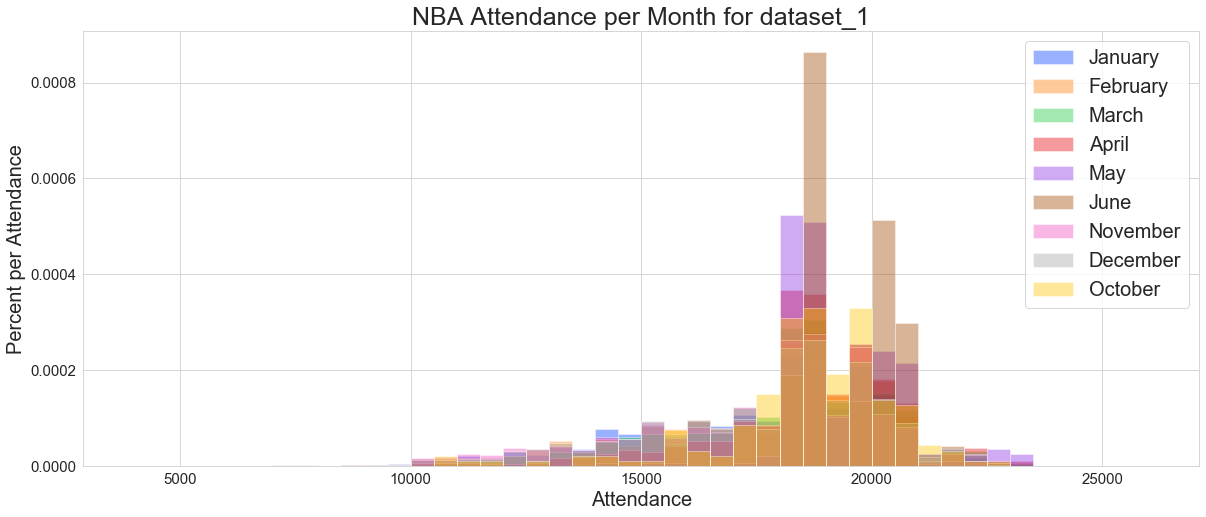

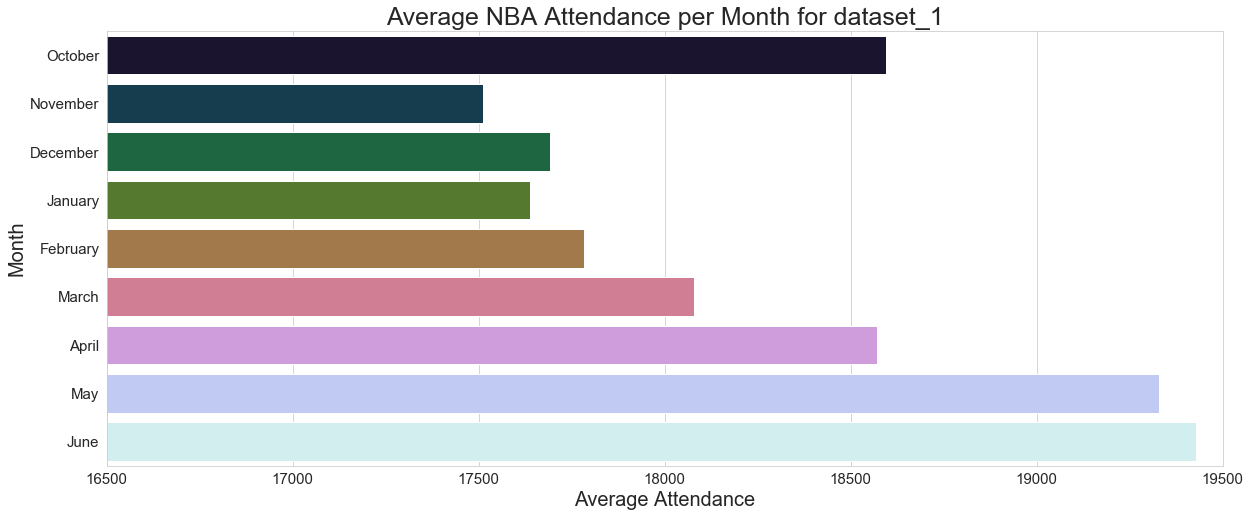

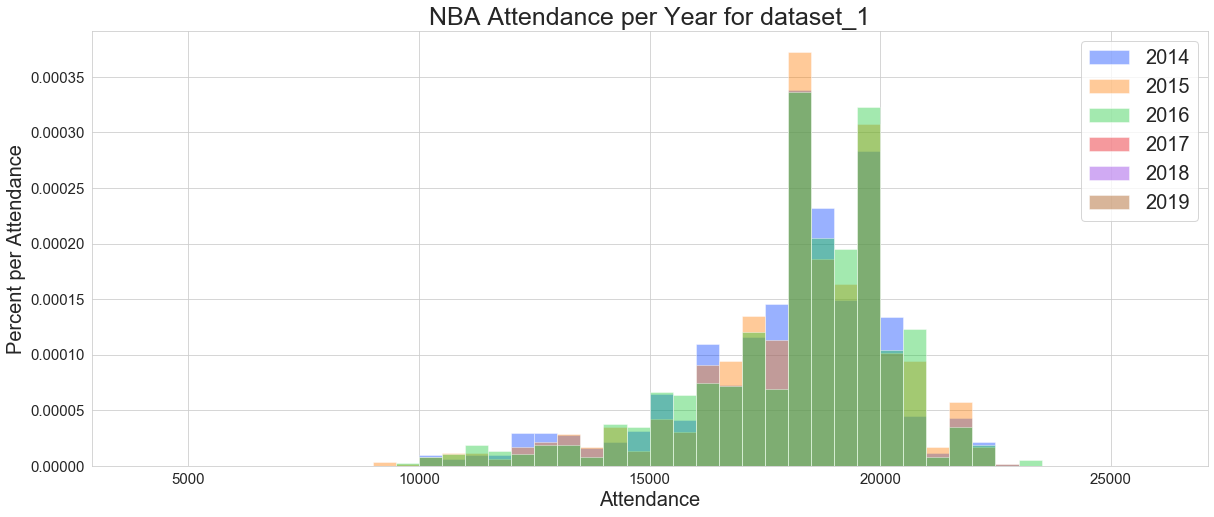

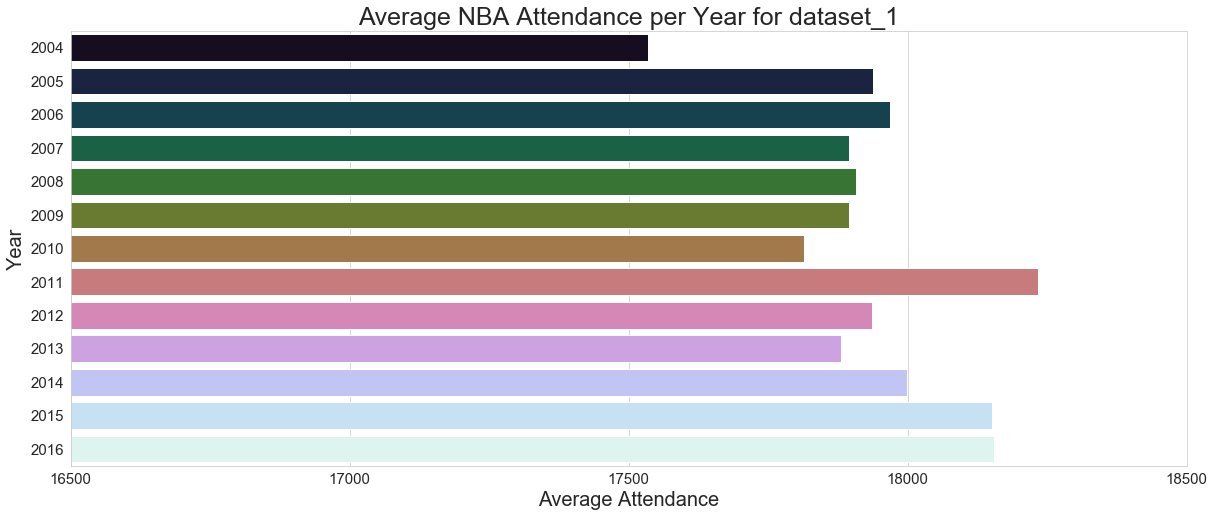

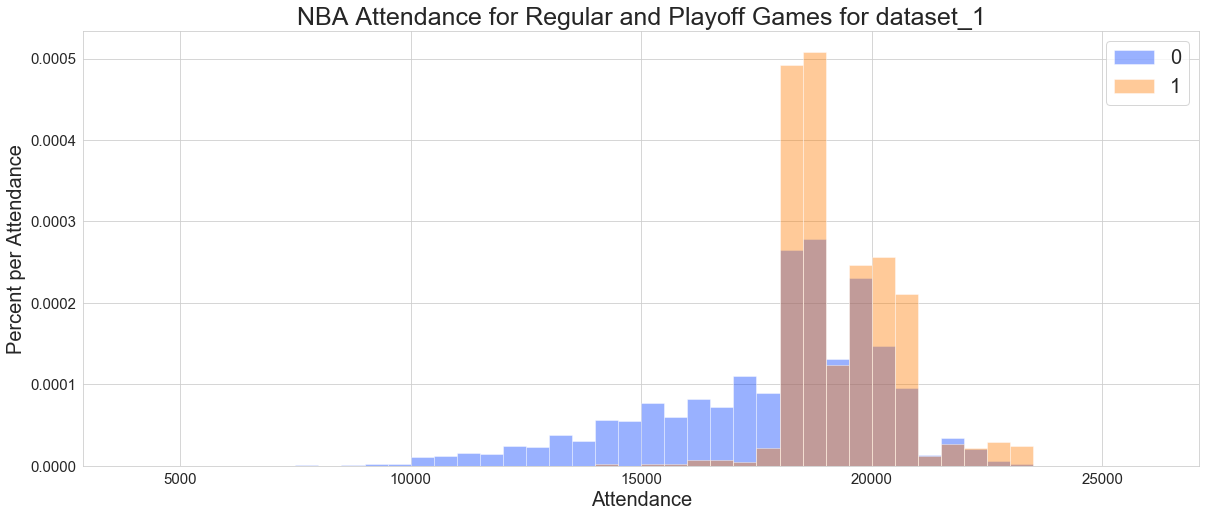

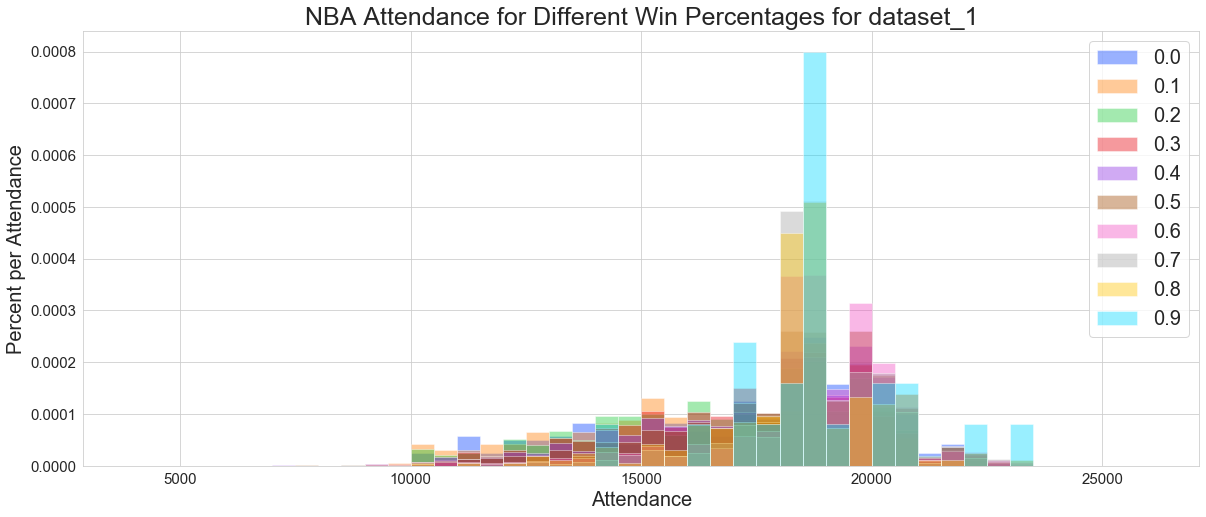

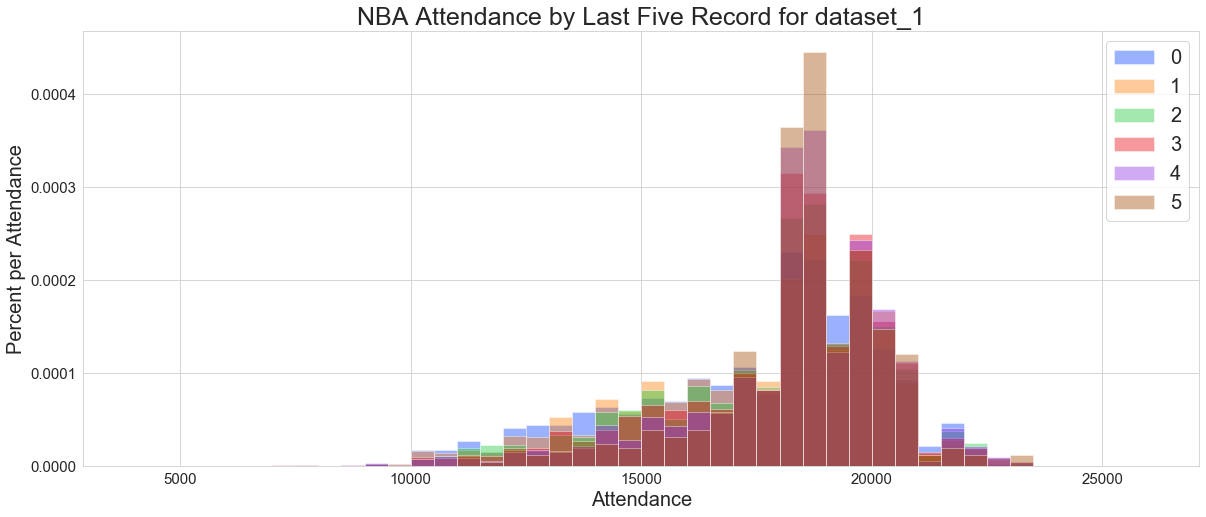

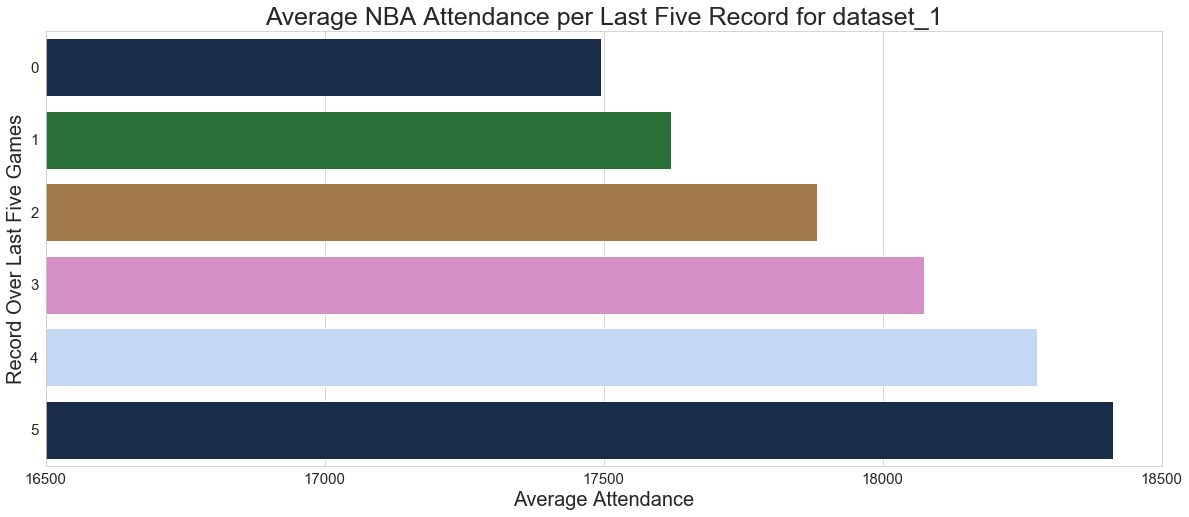

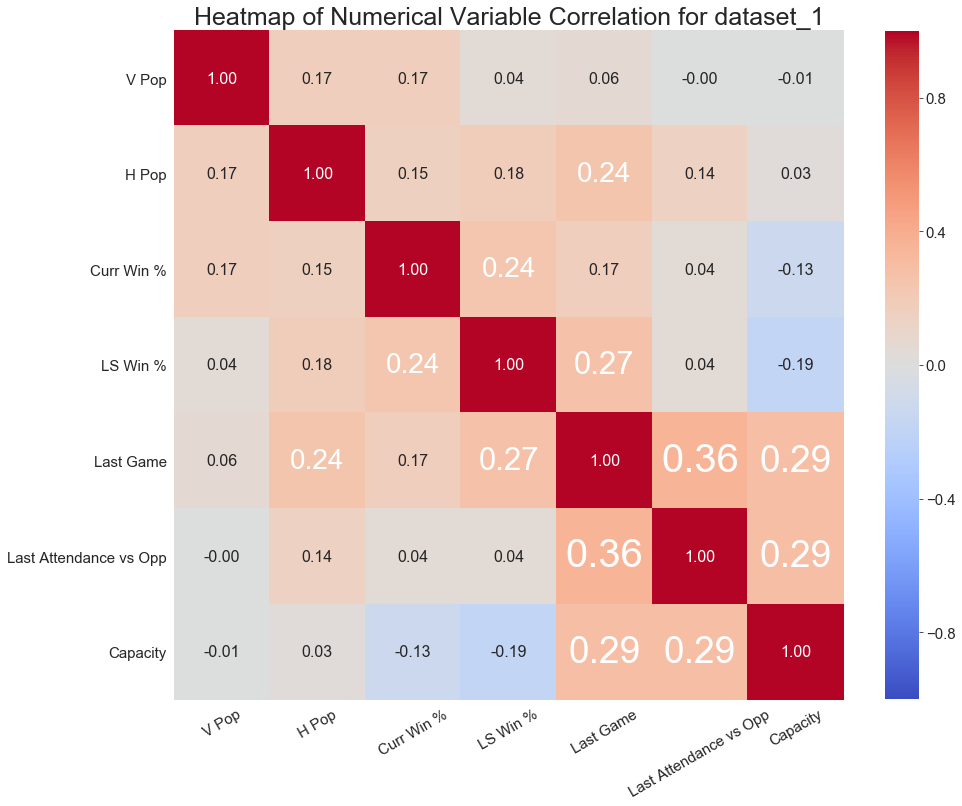

In [4]:
de.create_all_plots('dataset_1', train)

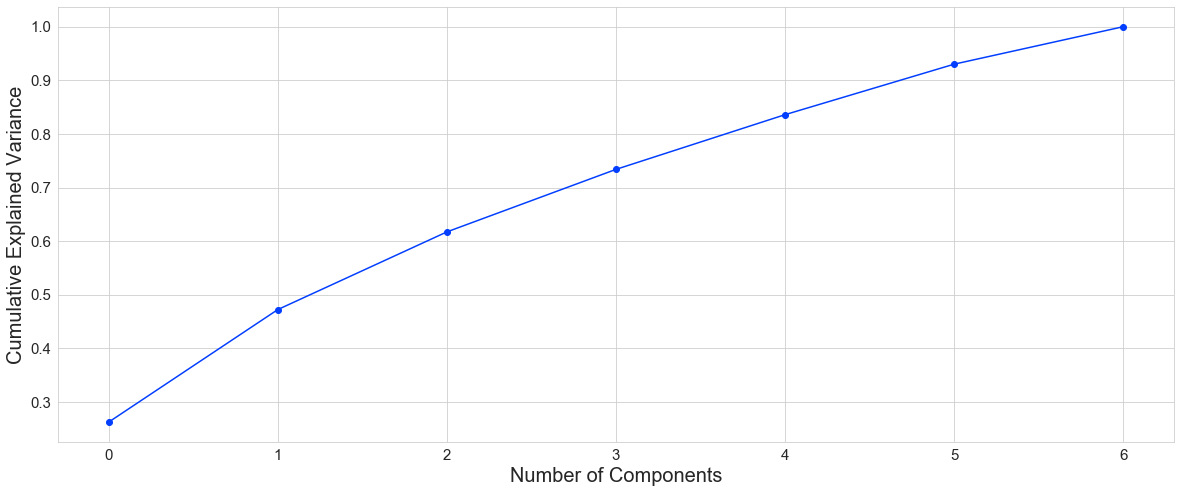

In [5]:
decomposition.pca_component_analysis('dataset_1', X_train)

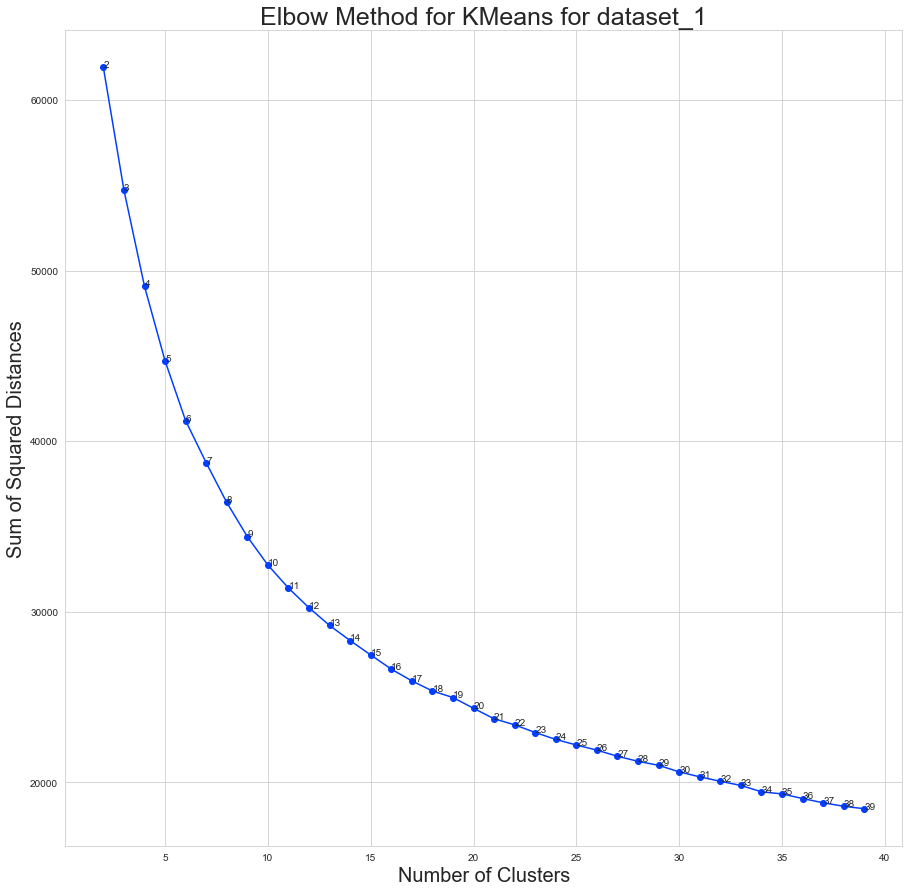

In [6]:
clustering.elbow_method_kmeans('dataset_1', X_train)

## Further consideration of feature selection through analytic metrics
---

In [7]:
st.collect_tests('dataset_1', X_train, y_train)

,VIF Round 0,VIF Round 1,VIF Round 2,VIF Round 3,VIF Round 4,Numerical Feature Significance (P-Value) dataset_1,Estimated Mutual Information dataset_1
Capacity,95.525098,NaN,NaN,NaN,NaN,6.409122e-208,1.563125
Curr Win %,8.593339,8.560417,8.309573,7.068645,NaN,3.253994e-117,0.100878
H Pop,1.942997,1.885766,1.872954,1.864811,1.847472,2.446348e-145,0.485304
LS Win %,14.711588,14.635264,12.744663,7.011414,2.175441,5.579368e-170,1.360198
Last Attendance vs Opp,65.394171,43.456027,13.657822,NaN,NaN,0.000000e+00,0.841755
Last Game,77.815671,55.294175,NaN,NaN,NaN,0.000000e+00,1.282701
V Pop,1.717040,1.712124,1.708218,1.702428,1.629296,7.495123e-28,0.042003


### Creating subset of dataset_1 based on best guess of important features and preparing it for modeling

In [4]:
dataset_1_1 = ds.create_dataset_1_1(dataset_1)
print("dataset_1_1 contains: {} observations; {} features: 4 numerical, 3 multiclass categorical, 2 binary categorical; 1 Response".format(len(dataset_1_1), len(dataset_1_1.columns)-1))
X_train_1, X_test_1, y_train_1, y_test_1, train_1 = split.split(dataset_1_1)
print("After split contains:")
print("{} observations in training set".format(len(X_train_1), len(X_train_1.columns)))
print("{} observations in test set".format(len(X_test_1), len(X_test_1.columns)))
print("28 features: 4 numerical, 24 binary categorical; 1 Response")

dataset_1_1 contains: 14088 observations; 9 features: 4 numerical, 3 multiclass categorical, 2 binary categorical; 1 Response
After split contains:
10566 observations in training set
3522 observations in test set
28 features: 4 numerical, 24 binary categorical; 1 Response


## Modeling
---

### Start with linear models that generally have simpler hyperparameters to tune

In [10]:
linear_statistics = linear_models.collect_all_statistics('dataset_1', X_train, X_test, y_train, y_test, 
                                                         'dataset_1_1', X_train_1, X_test_1, y_train_1, y_test_1)
linear_statistics.sort_values(['Mean Absolute Error']).head()

,R^2,Explained Variance Score,Mean Absolute Error,Root Mean Square Error,Mean Absolute Percent Error
dataset_1 Huber,0.485176,0.495562,836.845957,1472.416077,5.258367
dataset_1 Elastic Net TimeSeriesSplit,0.487082,0.498907,837.893970,1469.688387,5.266290
dataset_1_1 Elastic Net TimeSeriesSplit,0.435659,0.436162,905.350112,1541.600557,5.532346
dataset_1 Elastic Net with PCA TimeSeriesSplit,0.525466,0.530333,906.480512,1413.627299,5.526280
dataset_1 Huber with PCA,0.525466,0.530333,906.480512,1413.627299,5.526280


In [11]:
linear_statistics.sort_values(['R^2'], ascending = False).head(30)

,R^2,Explained Variance Score,Mean Absolute Error,Root Mean Square Error,Mean Absolute Percent Error
dataset_1 OLS TimeSeriesSplit,0.556238,0.557962,998.523289,1367.023999,5.942129
dataset_1 Ridge,0.556238,0.557962,998.523289,1367.023999,5.942129
dataset_1 OLS,0.556238,0.557962,998.523325,1367.024026,5.942129
dataset_1 Lasso with PCA,0.546707,0.548233,994.304102,1381.626905,5.905156
dataset_1 Lasso with PCA TimeSeriesSplit,0.546707,0.548233,994.304102,1381.626905,5.905156
dataset_1 Ridge with PCA TimeSeriesSplit,0.546707,0.548233,994.304102,1381.626905,5.905156
dataset_1 Elastic Net with PCA,0.546707,0.548233,994.304102,1381.626905,5.905156
dataset_1 Lasso with Standardized Features,0.545944,0.547431,994.878630,1382.789042,5.908502
dataset_1 Elastic Net with Standardized Features,0.545944,0.547431,994.878630,1382.789042,5.908502
dataset_1 Lasso with Standardized Features TimeSeriesSplit,0.545944,0.547431,994.878630,1382.789042,5.908502


### Next, ensemble methods 

In [7]:
random_forest_cv = ensembles.random_forest_randomized_cv(X_train,y_train, n_iter = 25)

In [10]:
random_forest_cv.cv_results_

{'mean_fit_time': array([ 7.61469069,  3.23631916,  8.80881052,  3.56278901,  8.01171532,
         9.37487531,  7.37142158,  3.82564335,  6.06267037,  1.72272406,
         1.81967793,  3.39855747,  3.71244564,  1.5946506 ,  6.42956691,
         5.57217097,  2.14318118,  2.9985467 ,  3.33771462,  3.21629553,
         3.97026763,  3.00899663,  3.3698463 ,  5.40330224, 12.31987782]),
 'std_fit_time': array([0.33774848, 0.07754708, 0.60874767, 0.45655174, 1.41246506,
        0.36943199, 0.84902811, 0.60155381, 0.55702431, 0.01886528,
        0.01006681, 0.26807646, 0.30406891, 0.15068098, 0.6676117 ,
        0.25502034, 0.05668033, 0.13423148, 0.53621234, 0.25714723,
        0.23640464, 0.38399583, 0.33323653, 0.60159032, 0.77542391]),
 'mean_score_time': array([0.110637  , 0.21347666, 0.21139159, 0.19133062, 0.21178374,
        0.23212523, 0.2136888 , 0.11166387, 0.11116843, 0.11125307,
        0.11072559, 0.11124697, 0.13076024, 0.11052985, 0.21273046,
        0.12967129, 0.11080379, 0.1

In [9]:
top_ten_by_all_rank = pd.DataFrame.from_dict(random_forest_cv.cv_results_)[['params', 'rank_test_R^2', 'rank_test_Explained Variance Score', 
                                                  'rank_test_Mean Absolute Error', 'rank_test_Root Mean Square Error',
                                                 'rank_test_Mean Absolute Percent Error']].sort_values(['rank_test_Mean Absolute Error', 
                                                                                                        'rank_test_R^2', 
                                                                                                        'rank_test_Explained Variance Score',
                                                                                                        'rank_test_Root Mean Square Error',
                                                                                                        'rank_test_Mean Absolute Percent Error']) #.head(10)['params'].values
top_ten_by_all_rank

,params,rank_test_R^2,rank_test_Explained Variance Score,rank_test_Mean Absolute Error,rank_test_Root Mean Square Error,rank_test_Mean Absolute Percent Error
23,"{'n_estimators': 850, 'min_samples_split': 2, ...",1,1,1,1,1
17,"{'n_estimators': 350, 'min_samples_split': 4, ...",2,2,2,2,2
22,"{'n_estimators': 400, 'min_samples_split': 4, ...",3,3,3,3,4
20,"{'n_estimators': 650, 'min_samples_split': 2, ...",5,6,4,5,7
11,"{'n_estimators': 550, 'min_samples_split': 2, ...",4,4,5,4,11
12,"{'n_estimators': 500, 'min_samples_split': 2, ...",7,8,6,7,5
2,"{'n_estimators': 900, 'min_samples_split': 4, ...",8,7,7,8,3
14,"{'n_estimators': 950, 'min_samples_split': 8, ...",9,9,8,9,6
18,"{'n_estimators': 250, 'min_samples_split': 4, ...",10,10,9,10,8
4,"{'n_estimators': 1000, 'min_samples_split': 16...",6,5,10,6,9


In [9]:
adaboost_cv = ensembles.adaboost_randomized_cv(X_train, y_train, n_iter = 25, cv = 5)

In [11]:
adaboost_cv.cv_results_

{'mean_fit_time': array([ 1.39281344,  0.4894424 ,  2.6388236 , 13.61678128,  3.08611765,
         1.11287799,  0.83915172,  1.41355257,  4.78711834,  0.93663106,
         0.91240673,  0.94071016,  0.44277463,  0.81811852,  1.76236668,
         4.75623813,  0.92279501,  0.92962294,  1.07520862,  0.45697441,
        32.1960402 ,  2.43440113,  1.3490067 ,  2.44113736,  1.29448638]),
 'std_fit_time': array([0.22394912, 0.00616948, 1.1168392 , 0.2242669 , 1.02568449,
        0.5125848 , 0.2880377 , 0.43511252, 1.48460981, 0.22678999,
        0.26551256, 0.24896106, 0.03453395, 0.2629974 , 0.52352836,
        1.47451787, 0.22191396, 0.21176196, 0.48741163, 0.04208408,
        3.5492883 , 0.82007576, 0.40827852, 0.80924048, 0.40775596]),
 'mean_score_time': array([0.03032932, 0.01507745, 0.06535134, 0.27523556, 0.08313603,
        0.02904873, 0.02034149, 0.0363379 , 0.0963944 , 0.02271347,
        0.02485037, 0.02432499, 0.01391573, 0.02045364, 0.03623557,
        0.10893741, 0.02428422, 0.0

In [10]:
top_ten_by_all_rank = pd.DataFrame.from_dict(adaboost_cv.cv_results_)[['params', 'rank_test_R^2', 'rank_test_Explained Variance Score', 
                                                  'rank_test_Mean Absolute Error', 'rank_test_Root Mean Square Error',
                                                 'rank_test_Mean Absolute Percent Error']].sort_values(['rank_test_Mean Absolute Error', 
                                                                                                        'rank_test_R^2', 
                                                                                                        'rank_test_Explained Variance Score',                                                                                                    
                                                                                                        'rank_test_Root Mean Square Error',
                                                                                                        'rank_test_Mean Absolute Percent Error']).head(10)['params'].values
top_ten_by_all_rank

array([{'n_estimators': 20, 'learning_rate': 0.23},
       {'n_estimators': 460, 'learning_rate': 0.01},
       {'n_estimators': 20, 'learning_rate': 0.34},
       {'n_estimators': 20, 'learning_rate': 0.45},
       {'n_estimators': 2000, 'learning_rate': 0.01},
       {'n_estimators': 1780, 'learning_rate': 0.12},
       {'n_estimators': 680, 'learning_rate': 0.12},
       {'n_estimators': 2000, 'learning_rate': 0.23},
       {'n_estimators': 1340, 'learning_rate': 0.23},
       {'n_estimators': 900, 'learning_rate': 0.23}], dtype=object)

In [4]:
gradient_boosting_cv = ensembles.gradient_boosting_randomized_cv(X_train, y_train, n_iter = 25, cv= 5)

In [5]:
gradient_boosting_cv_boosting_cv.cv_results_

{'mean_fit_time': array([10.31646929,  6.901333  , 29.76070647, 22.92191935, 33.62641463,
        40.00695791, 18.04850698,  0.30775499, 17.87200527,  9.17996473,
        31.60217905, 22.57626057,  8.2816452 , 13.43358488,  0.32335906,
         7.54760342, 12.87112122, 10.9020206 ,  8.31097398, 30.38534203,
        20.33043318,  0.37609992, 17.6880218 , 20.76584105, 13.30880356]),
 'std_fit_time': array([0.02629742, 0.04822203, 0.2095405 , 0.17624407, 0.16969514,
        0.93519463, 0.52370992, 0.03825649, 0.08545646, 0.07415796,
        0.37331562, 1.22558542, 0.08672022, 0.0666026 , 0.00984785,
        0.3627831 , 0.09383217, 0.08968326, 0.0617205 , 0.21478126,
        0.62591351, 0.0101344 , 0.06286145, 0.24822618, 1.09428575]),
 'mean_score_time': array([0.02645936, 0.02207742, 0.06217813, 0.04344902, 0.05846734,
        0.07229266, 0.04027486, 0.00644941, 0.0362546 , 0.02019053,
        0.03708725, 0.04965339, 0.01795812, 0.02870116, 0.00452938,
        0.01454291, 0.04595833, 0.0

In [6]:
top_ten_by_all_rank = pd.DataFrame.from_dict(gradient_boosting_cv.cv_results_)[['params', 'rank_test_R^2', 'rank_test_Explained Variance Score', 
                                                  'rank_test_Mean Absolute Error', 'rank_test_Root Mean Square Error',
                                                 'rank_test_Mean Absolute Percent Error']].sort_values(['rank_test_Mean Absolute Error', 
                                                                                                        'rank_test_Explained Variance Score',
                                                                                                        'rank_test_R^2', 
                                                                                                        'rank_test_Root Mean Square Error',
                                                                                                        'rank_test_Mean Absolute Percent Error']).head(10)['params'].values
top_ten_by_all_rank

array([{'n_estimators': 1780, 'loss': 'lad', 'learning_rate': 0.223},
       {'n_estimators': 20, 'loss': 'huber', 'learning_rate': 0.556},
       {'n_estimators': 20, 'loss': 'ls', 'learning_rate': 0.445},
       {'n_estimators': 20, 'loss': 'lad', 'learning_rate': 0.334},
       {'n_estimators': 680, 'loss': 'lad', 'learning_rate': 0.778},
       {'n_estimators': 2000, 'loss': 'huber', 'learning_rate': 0.112},
       {'n_estimators': 460, 'loss': 'lad', 'learning_rate': 0.889},
       {'n_estimators': 900, 'loss': 'ls', 'learning_rate': 0.223},
       {'n_estimators': 900, 'loss': 'huber', 'learning_rate': 0.334},
       {'n_estimators': 460, 'loss': 'huber', 'learning_rate': 0.445}],
      dtype=object)

In [5]:
extra_trees_cv = ensembles.extra_trees_randomized_cv(X_train, y_train, n_iter = 25, cv = 5)

In [6]:
extra_trees_cv.cv_results_

{'mean_fit_time': array([ 5.1478518 , 17.47599645, 47.70879369,  8.13122759,  6.27820063,
        59.43465066, 32.19693742, 15.43521676, 52.3560802 ,  8.39885573,
        11.89176817, 13.14773164, 10.6630342 , 12.18810573, 11.48483777,
        52.93306909,  6.44712625, 28.11889391, 10.41929836, 25.22813382,
        33.17859397, 14.73251443, 59.26162076, 33.42394338,  5.55038238]),
 'std_fit_time': array([0.03981211, 0.93841097, 0.84443658, 1.06656435, 0.11679344,
        0.23036305, 2.54405866, 0.56367727, 0.60320601, 0.94234254,
        0.13804563, 0.16595001, 0.16442316, 0.09338594, 0.49992202,
        0.31819687, 0.23008195, 0.12109054, 0.1678328 , 0.24618207,
        1.29532844, 0.83575824, 0.53087679, 2.16211551, 0.23050215]),
 'mean_score_time': array([0.1888247 , 0.39318075, 0.86479907, 0.19936543, 0.33984289,
        7.41224737, 1.1045795 , 0.66986985, 0.70057478, 0.39406457,
        0.79219275, 0.94316483, 0.38839455, 0.56018729, 0.31633735,
        0.79903359, 0.31285396, 0.4

In [7]:
top_ten_by_all_rank = pd.DataFrame.from_dict(extra_trees_cv.cv_results_)[['params', 'rank_test_R^2', 'rank_test_Explained Variance Score', 
                                                  'rank_test_Mean Absolute Error', 'rank_test_Root Mean Square Error',
                                                 'rank_test_Mean Absolute Percent Error']].sort_values(['rank_test_Mean Absolute Error', 
                                                                                                        'rank_test_Explained Variance Score',
                                                                                                        'rank_test_R^2', 
                                                                                                        'rank_test_Root Mean Square Error',
                                                                                                        'rank_test_Mean Absolute Percent Error']).head(10)['params'].values
top_ten_by_all_rank

array([{'n_estimators': 2000, 'min_samples_split': 2, 'max_features': 14},
       {'n_estimators': 400, 'min_samples_split': 2, 'max_features': 16},
       {'n_estimators': 400, 'min_samples_split': 10, 'max_features': 15},
       {'n_estimators': 1800, 'min_samples_split': 10, 'max_features': 14},
       {'n_estimators': 1800, 'min_samples_split': 2, 'max_features': 17},
       {'n_estimators': 1000, 'min_samples_split': 5, 'max_features': 19},
       {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 15},
       {'n_estimators': 800, 'min_samples_split': 10, 'max_features': 14},
       {'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 18},
       {'n_estimators': 600, 'min_samples_split': 10, 'max_features': 24}],
      dtype=object)

### Moving on to neural networks

In [4]:
nn_statistics = nn.collect_statistics('dataset_1',X_train, X_test, y_train, y_test)
nn_statistics.sort_values(['Mean Absolute Error']).head()

,R^2,Explained Variance Score,Mean Absolute Error,Root Mean Square Error,Mean Absolute Percent Error
dataset_1 Simple Network,0.528858,0.533770,877.851714,1408.565786,5.445358
dataset_1 Simple Network with PCA,-3.668938,0.400176,4170.048851,4434.148277,22.884426
dataset_1 Simple Network with Standardized Features,-7.955955,0.390373,5932.191662,6141.254776,32.852648


In [6]:
nn_statistics.sort_values(['R^2'], ascending = False).head()

,R^2,Explained Variance Score,Mean Absolute Error,Root Mean Square Error,Mean Absolute Percent Error
dataset_1 Simple Network,0.528858,0.533770,877.851714,1408.565786,5.445358
dataset_1 Simple Network with PCA,-3.668938,0.400176,4170.048851,4434.148277,22.884426
dataset_1 Simple Network with Standardized Features,-7.955955,0.390373,5932.191662,6141.254776,32.852648
